### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

### Importing the power meters data

In [2]:
powerMetersData = pd.read_csv("FullRawPowerMeters.csv", index_col="timestamp", parse_dates=True)

### looking at the data types of the columns

In [3]:
powerMetersData.dtypes

BH_04_01_Power_Meter         float64
BH_06_01_Power_Meter         float64
BH_08_01_Power_Meter         float64
BH_10_01_Power_Meter         float64
BH_12_01_Power_Meter         float64
                              ...   
SC_Main_Power_Meter          float64
SC_SB_Canteen_Power_Meter    float64
SC_SB_Carpark_Main_Meter     float64
SC_SSH_1_Power_Meter         float64
SC_Shop_Power_Meter          float64
Length: 70, dtype: object

### getting a sense of the data

In [4]:
powerMetersData.index

DatetimeIndex(['2011-06-01 00:00:00', '2011-06-01 00:03:00',
               '2011-06-01 00:06:00', '2011-06-01 00:09:00',
               '2011-06-01 00:12:00', '2011-06-01 00:15:00',
               '2011-06-01 00:18:00', '2011-06-01 00:21:00',
               '2011-06-01 00:24:00', '2011-06-01 00:27:00',
               ...
               '2013-10-29 08:58:15', '2013-10-29 09:00:05',
               '2013-10-29 09:01:29', '2013-10-29 09:02:58',
               '2013-10-29 09:04:28', '2013-10-29 09:05:47',
               '2013-10-29 09:07:00', '2013-10-29 09:08:14',
               '2013-10-29 09:09:30', '2013-10-29 09:10:44'],
              dtype='datetime64[ns]', name='timestamp', length=1297076, freq=None)

In [5]:
powerMetersData.head(5)

,BH_04_01_Power_Meter,BH_06_01_Power_Meter,BH_08_01_Power_Meter,BH_10_01_Power_Meter,BH_12_01_Power_Meter,BH_Main_Power_Meter,BH_PAHU_1_Power_Meter,BH_PAHU_2_Power_Meter,Blk_A_AHU_1_1_Power_Meter,Blk_A_AHU_1_2_Power_Meter,...,SC_Canteen_Kitchen_Power_Meter,SC_Carpark_Exhaust_Fan_Power_Meter,SC_DB_Pool_Power_Meter,SC_JSH_1_Power_Meter,SC_MB_Black_Box_Power_Meter,SC_Main_Power_Meter,SC_SB_Canteen_Power_Meter,SC_SB_Carpark_Main_Meter,SC_SSH_1_Power_Meter,SC_Shop_Power_Meter
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
powerMetersData.tail(5)

,BH_04_01_Power_Meter,BH_06_01_Power_Meter,BH_08_01_Power_Meter,BH_10_01_Power_Meter,BH_12_01_Power_Meter,BH_Main_Power_Meter,BH_PAHU_1_Power_Meter,BH_PAHU_2_Power_Meter,Blk_A_AHU_1_1_Power_Meter,Blk_A_AHU_1_2_Power_Meter,...,SC_Canteen_Kitchen_Power_Meter,SC_Carpark_Exhaust_Fan_Power_Meter,SC_DB_Pool_Power_Meter,SC_JSH_1_Power_Meter,SC_MB_Black_Box_Power_Meter,SC_Main_Power_Meter,SC_SB_Canteen_Power_Meter,SC_SB_Carpark_Main_Meter,SC_SSH_1_Power_Meter,SC_Shop_Power_Meter
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-10-29 09:05:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583095.0,NaN,NaN
2013-10-29 09:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583097.0,NaN,NaN
2013-10-29 09:08:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583099.0,NaN,NaN
2013-10-29 09:09:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583101.0,NaN,NaN
2013-10-29 09:10:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583103.0,NaN,NaN


### showing 5 randomly selected rows

In [7]:
powerMetersData.sample(n=5)

,BH_04_01_Power_Meter,BH_06_01_Power_Meter,BH_08_01_Power_Meter,BH_10_01_Power_Meter,BH_12_01_Power_Meter,BH_Main_Power_Meter,BH_PAHU_1_Power_Meter,BH_PAHU_2_Power_Meter,Blk_A_AHU_1_1_Power_Meter,Blk_A_AHU_1_2_Power_Meter,...,SC_Canteen_Kitchen_Power_Meter,SC_Carpark_Exhaust_Fan_Power_Meter,SC_DB_Pool_Power_Meter,SC_JSH_1_Power_Meter,SC_MB_Black_Box_Power_Meter,SC_Main_Power_Meter,SC_SB_Canteen_Power_Meter,SC_SB_Carpark_Main_Meter,SC_SSH_1_Power_Meter,SC_Shop_Power_Meter
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-30 14:33:00,NaN,NaN,NaN,NaN,4.513125,NaN,NaN,NaN,7490.0,5379.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2012-12-02 07:10:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,801065.0,NaN,NaN,NaN,NaN
2013-03-06 21:09:56,NaN,15722.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-02 11:13:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476416.0,NaN,NaN
2013-01-22 09:10:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### basic descriptives


In [8]:
powerMetersData.describe()

,BH_04_01_Power_Meter,BH_06_01_Power_Meter,BH_08_01_Power_Meter,BH_10_01_Power_Meter,BH_12_01_Power_Meter,BH_Main_Power_Meter,BH_PAHU_1_Power_Meter,BH_PAHU_2_Power_Meter,Blk_A_AHU_1_1_Power_Meter,Blk_A_AHU_1_2_Power_Meter,...,SC_Canteen_Kitchen_Power_Meter,SC_Carpark_Exhaust_Fan_Power_Meter,SC_DB_Pool_Power_Meter,SC_JSH_1_Power_Meter,SC_MB_Black_Box_Power_Meter,SC_Main_Power_Meter,SC_SB_Canteen_Power_Meter,SC_SB_Carpark_Main_Meter,SC_SSH_1_Power_Meter,SC_Shop_Power_Meter
count,101983.000000,101833.000000,156511.000000,100873.000000,386174.000000,63936.000000,98522.000000,98523.000000,239468.000000,239469.000000,...,7065.000000,131008.000000,46713.000000,131165.000000,192973.000000,331294.000000,193444.000000,140474.000000,130460.000000,49464.000000
mean,9079.816081,10834.145632,8371.132344,10883.800486,6437.127204,196952.917089,8112.669396,17406.019957,6053.321322,4201.801109,...,4287.039349,1337.218483,5569.387056,52696.885251,15571.659512,563536.205820,188707.908883,358609.466649,95652.705045,937.269085
std,6831.584050,6610.034904,6642.400654,8128.256700,6854.575001,118972.587148,4436.482984,9308.481908,2161.342513,1595.625495,...,550.702272,1325.058587,1320.095867,26270.859868,7204.853084,148448.561418,107203.067576,195616.329133,48970.402489,615.308388
min,3583.054900,0.000000,0.000000,5.175625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3330.000000,0.000000,0.000000,0.000000,0.000000,125699.000000,0.000000,0.000000,0.000000,0.000000
25%,4882.969450,5344.486800,2671.009000,5948.159200,6.301875,113314.750000,4377.424925,9092.450200,4496.100100,3098.700000,...,3825.000000,312.000000,4748.026900,27885.962900,11550.000000,493487.250000,100190.000000,101420.500000,48183.327250,753.000000
50%,6566.083000,9485.251000,5698.816900,8288.446300,7062.000000,128904.500000,7276.200200,16693.801000,6095.200200,4175.200200,...,4331.000000,936.000000,6404.000000,48638.913500,16733.000000,576753.500000,202399.000000,444463.000000,88101.969000,759.000000
75%,10621.020000,13992.830000,10856.130000,14510.110000,10331.110000,355678.000000,11502.625000,25633.250000,7777.449950,5673.000000,...,4625.000000,1523.000000,6404.001000,75259.530500,21162.000000,659859.750000,264067.250000,513573.500000,139545.475000,797.000000
max,56436.090000,73096.953000,34548.000000,80893.281000,115716.400000,389543.000000,16782.199000,34360.199000,9654.299800,6589.799800,...,5501.000000,4756.000000,6404.005900,145820.000000,26720.000000,826052.000000,386988.000000,583103.000000,183925.200000,3397.000000


In [9]:
powerMetersData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1297076 entries, 2011-06-01 00:00:00 to 2013-10-29 09:10:44
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   BH_04_01_Power_Meter                101983 non-null  float64
 1   BH_06_01_Power_Meter                101833 non-null  float64
 2   BH_08_01_Power_Meter                156511 non-null  float64
 3   BH_10_01_Power_Meter                100873 non-null  float64
 4   BH_12_01_Power_Meter                386174 non-null  float64
 5   BH_Main_Power_Meter                 63936 non-null   float64
 6   BH_PAHU_1_Power_Meter               98522 non-null   float64
 7   BH_PAHU_2_Power_Meter               98523 non-null   float64
 8   Blk_A_AHU_1_1_Power_Meter           239468 non-null  float64
 9   Blk_A_AHU_1_2_Power_Meter           239469 non-null  float64
 10  Blk_A_AHU_2_1_Power_Meter           239468 non-null  floa

<Axes: xlabel='timestamp'>

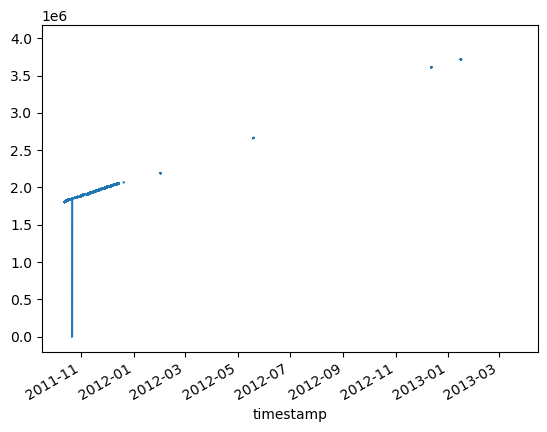

In [10]:
powerMetersData["Main_Building_LT1_S6_Power_Meter"].plot()

### There are 227831 non-null values in 1297076 index entries. It seems like there is too much of missing data. Hence this dataset is not so suitable for analysis. 

<Axes: >

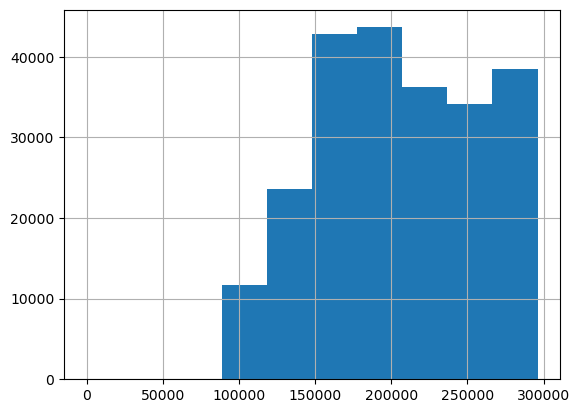

In [11]:
powerMetersData["EMSB_Main_Power_Meter"].hist()

# Importing New data

In [4]:
newData = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
newData

,Office_Garman
timestamp,
2014-12-01 00:00:00,299.3
2014-12-01 01:00:00,315.0
2014-12-01 02:00:00,311.3
2014-12-01 03:00:00,314.7
2014-12-01 04:00:00,316.0
...,...
2015-11-30 19:00:00,428.1
2015-11-30 20:00:00,412.8
2015-11-30 21:00:00,386.5


In [13]:
newData.dtypes

Office_Garman    float64
dtype: object

In [14]:
newData.index

DatetimeIndex(['2014-12-01 00:00:00', '2014-12-01 01:00:00',
               '2014-12-01 02:00:00', '2014-12-01 03:00:00',
               '2014-12-01 04:00:00', '2014-12-01 05:00:00',
               '2014-12-01 06:00:00', '2014-12-01 07:00:00',
               '2014-12-01 08:00:00', '2014-12-01 09:00:00',
               ...
               '2015-11-30 14:00:00', '2015-11-30 15:00:00',
               '2015-11-30 16:00:00', '2015-11-30 17:00:00',
               '2015-11-30 18:00:00', '2015-11-30 19:00:00',
               '2015-11-30 20:00:00', '2015-11-30 21:00:00',
               '2015-11-30 22:00:00', '2015-11-30 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=8760, freq=None)

In [15]:
newData.describe()

,Office_Garman
count,8760.000000
mean,366.703308
std,96.865151
min,142.000000
25%,288.175000
50%,318.750000
75%,455.850000
max,636.587500


In [16]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-12-01 00:00:00 to 2015-11-30 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Office_Garman  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


### visualizing data

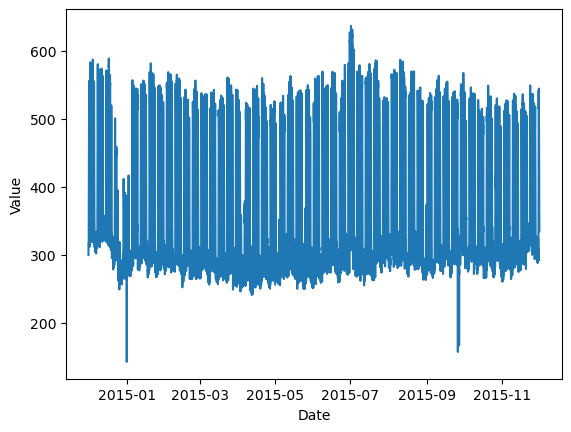

In [17]:
plt.plot(newData)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

There seems to be a few outliers in the data, which could be explained by holidays or other breaks. Othereise the time series seems to be stationary visually, although there is a seasonal component. 

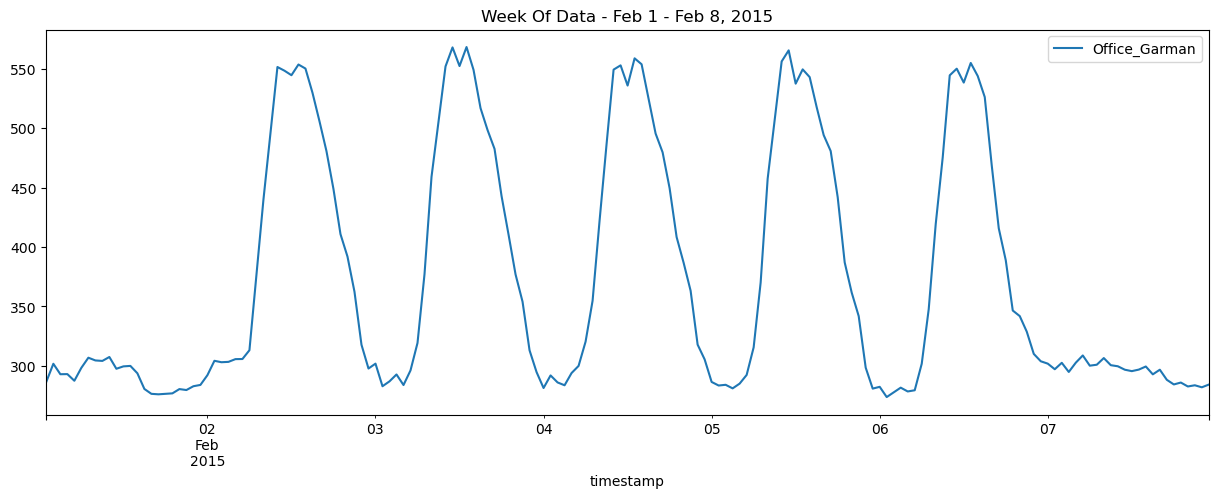

In [16]:
newData.loc[(newData.index > '02-01-2015') & (newData.index < '02-08-2015')] \
    .plot(figsize=(15, 5), title='Week Of Data - Feb 1 - Feb 8, 2015')
plt.show()

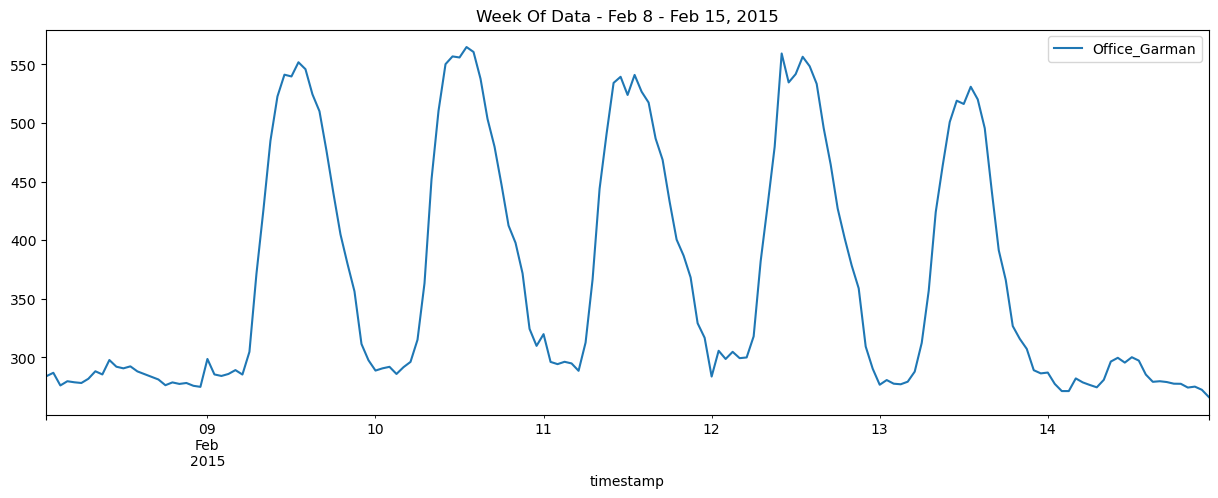

In [17]:
newData.loc[(newData.index > '02-08-2015') & (newData.index < '02-15-2015')] \
    .plot(figsize=(15, 5), title='Week Of Data - Feb 8 - Feb 15, 2015')
plt.show()

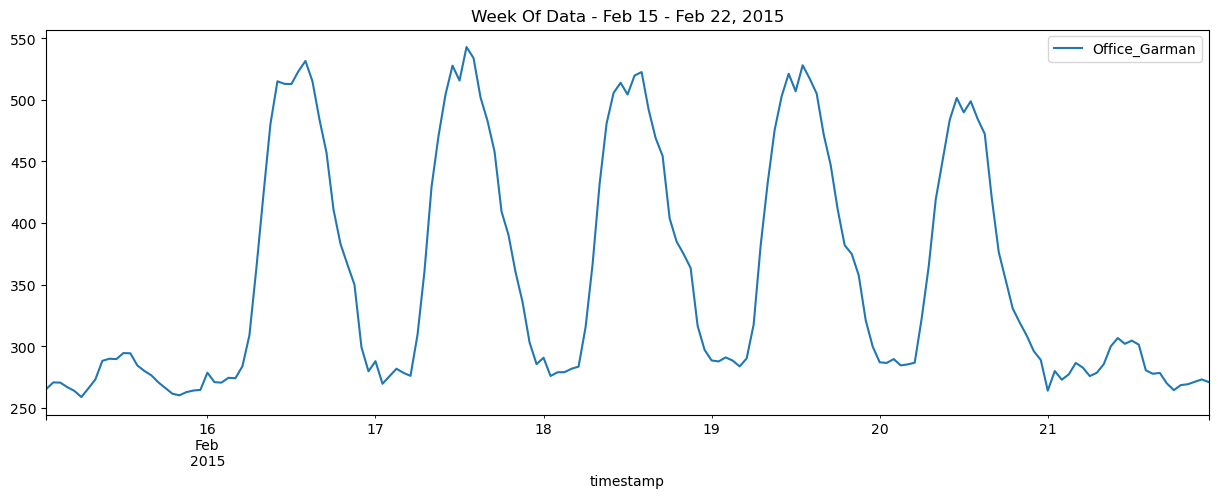

In [18]:
newData.loc[(newData.index > '02-15-2015') & (newData.index < '02-22-2015')] \
    .plot(figsize=(15, 5), title='Week Of Data - Feb 15 - Feb 22, 2015')
plt.show()

The arbitrarily chosen three weeks data plotted above shows strong 24-hour seasonality with the weekend effect as well. 

<Axes: >

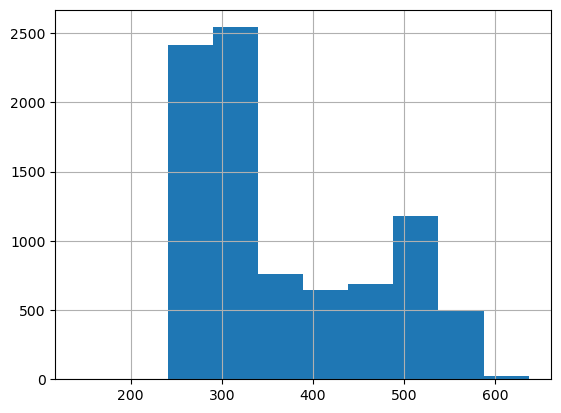

In [18]:
newData["Office_Garman"].hist()

# Model selection

### checking for stationarity


#### Performing the ADF test

In [19]:
adf_test = adfuller(newData['Office_Garman'])
print('ADF test statistic:', adf_test[0])
print('ADF p-value:', adf_test[1])
print('ADF critical values:', adf_test[4])

ADF test statistic: -14.195454892102129
ADF p-value: 1.8258400392885057e-26
ADF critical values: {'1%': -3.431099882538333, '5%': -2.8618713981324873, '10%': -2.56694639826003}


The ADF p-value is very small (1.8258400392885057e-26), which suggests strong evidence against the null hypothesis of a unit root (i.e., non-stationarity) in the time series. Hence this time series is stationary. 

#### Performing the KPSS test

In [20]:
kpss_test = kpss(newData['Office_Garman'])
print('KPSS test statistic:', kpss_test[0])
print('KPSS p-value:', kpss_test[1])
print('KPSS critical values:', kpss_test[3])

KPSS test statistic: 0.20826413709904995
KPSS p-value: 0.1
KPSS critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/p5/4n4tz9b556x0wctr33bl1jkh0000gp/T/ipykernel_30245/3135045536.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(newData['Office_Garman'])


This warning message typically means that the KPSS test statistic is very large or very small, and the p-value computed from the test statistic is outside the range of p-values available in the look-up table. In such cases, it is recommended to interpret the p-value as being either very close to 0 or very close to 1. Since the p-value "0.1" is very close to 0, this suggests strong evidence against the null hypothesis of stationarity (i.e., the time series is likely non-stationary). Hence, according to KPSS test, the time series is stationary. 

In this case, there seems to be a contradiction between the results of the two tests. However, it is worth noting that the KPSS test is generally less powerful for detecting stationarity than the ADF test, and may produce more false negatives (i.e., fail to reject the null hypothesis of stationarity when the time series is actually non-stationary).

Given the strong evidence of stationarity from the ADF test, it is reasonable to conclude that the time series is likely stationary. 

### plotting the ACF

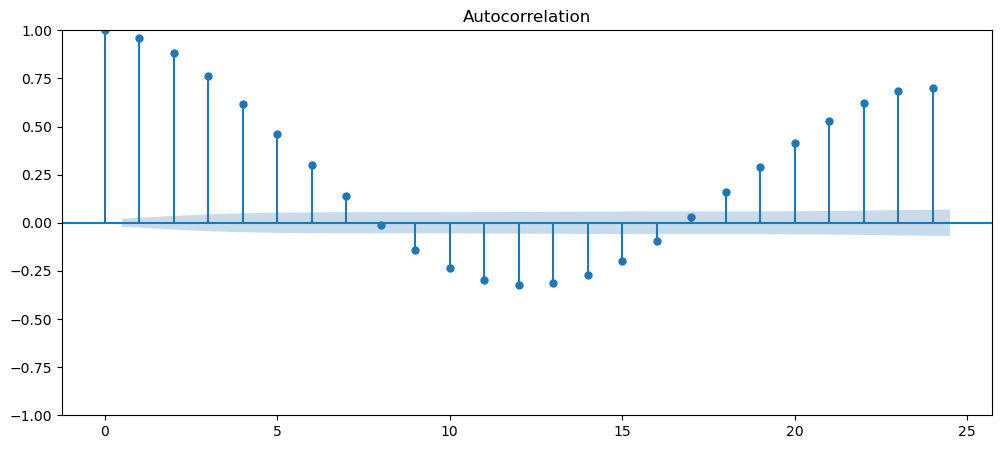

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(newData, ax=ax, lags=24)
plt.show()

Because it is hourly data, the lags were specified as 24. The ACF plot shows a high correlation at the first lag and then decays gradually to form a wave-like pattern, it suggests that the time series have a seasonal component.

The high correlation at the first lag suggests that there is a strong relationship between the value of the time series at a given time point and the value at the next time point with the same seasonality (i.e., the next hour). The gradual decay of the ACF plot indicates that this relationship persists over multiple time lags, which is consistent with a seasonal pattern.

The number of peaks in the wave can indicate the frequency of the seasonality. For example, if there are 12 peaks in the wave, this suggests a monthly seasonality, while 52 peaks suggest a weekly seasonality. In this case the ACF plot is like a cosine wave with peaks starting and ending with the plot, it suggests that there is a repeating pattern in the data with a period of 24 hours. This is consistent with a daily seasonality, as there are 24 hours in a day.

The cosine shape of the ACF plot suggests that the seasonal effect is sinusoidal, with a maximum and minimum occurring at regular intervals. This pattern could be caused by various factors, such as diurnal variations in temperature or sunlight, or daily patterns in human behavior or activity.

If the time series does indeed have a seasonal component, this can be incorporated into an ARIMA model using the SARIMA (Seasonal ARIMA) model, which includes additional seasonal parameters in addition to the regular ARIMA parameters.

### plotting the PACF


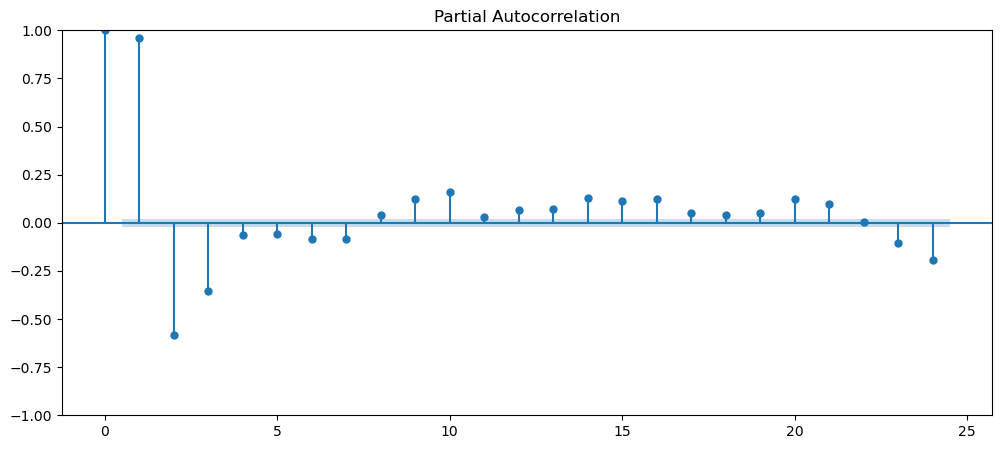

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(newData, ax=ax, lags=24)
plt.show()

There are significant spikes at the first and other lags in the PACF plotand and there is daily seasonality in the time series, this suggests that an ARIMA model with daily seasonality may be appropriate.


## SARIMA model

SARIMA is an extension of the ARIMA model that includes seasonal components. A SARIMA model includes additional parameters to model the seasonal component of the data, such as the seasonal differencing parameter, the seasonal AR parameter, and the seasonal MA parameter.

#### Setting the frequency of the timestamp index to hourly frequency

In [23]:
newData = newData.drop_duplicates()
newData = newData.asfreq('H')

#### Filling any missing values with forward fill

In [24]:
newData = newData.fillna(method='ffill')

#### Splitting the data for training and testing

In [25]:
train = newData[:'2015-09-30']
test = newData['2015-10-01':]

#### Fitting a SARIMA(1,1,1)(1,1,1,24) model

In [26]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24), enforce_stationarity=False, enforce_invertibility=False)
## model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24))
results = model.fit(method='powell')

Optimization terminated successfully.
         Current function value: 4.764717
         Iterations: 3
         Function evaluations: 166


#### Printing the model summary

In [27]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Office_Garman   No. Observations:                 7296
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -34763.373
Date:                            Thu, 18 May 2023   AIC                          69536.746
Time:                                    16:00:16   BIC                          69571.186
Sample:                                12-01-2014   HQIC                         69548.593
                                     - 09-30-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3335      0.288      1.158      0.247      -0.231       0.898
ma.L1         -0.3707      0.282   

#### Generating forecast for testing set

In [28]:
forecast = results.forecast(len(test))

#### Plotting actual and forecasted data

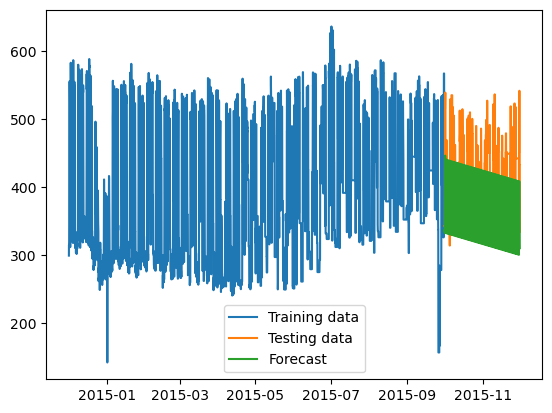

In [29]:
plt.plot(train.index, train, label="Training data")
plt.plot(test.index, test, label="Testing data")
plt.plot(forecast.index, forecast, label="Forecast")
plt.legend()
plt.show()

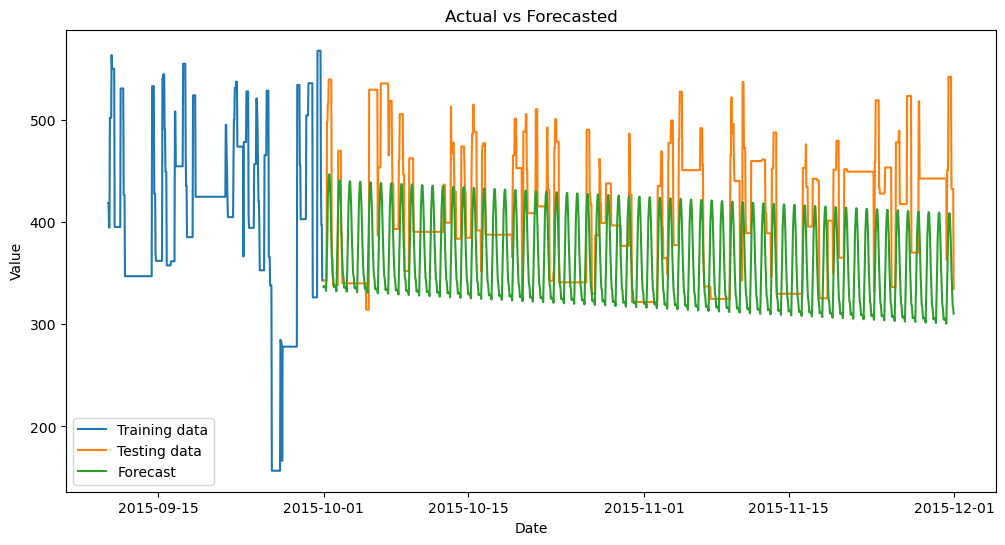

In [30]:
# plotting a bit better visually, by removing part of the training data

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train.index[-500:], train[-500:], label='Training data')
ax.plot(test.index, test, label='Testing data')
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Actual vs Forecasted')
ax.legend()
plt.show()

The SARIMA forecast is not predicting well and showing a uniform wave shape, it could indicate that the model is not capturing all the relevant information in the data or that the model assumptions are not being met.

### diagnostics of residuals of SARIMA model

In [31]:
residuals = results.resid

#### Calculating autocorrelation of residuals

In [32]:
acf_values = np.correlate(residuals, residuals, mode='full')

#### Plotting autocorrelation

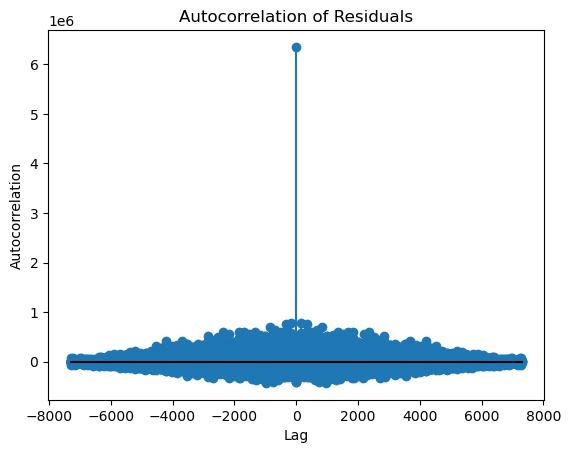

In [33]:
lags = np.arange(-len(residuals) + 1, len(residuals))
plt.stem(lags, acf_values, linefmt='C0-', markerfmt='C0o', basefmt='k-')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Residuals')
plt.show()

The autocorrelation at lag 0 should always be 1. This indicates the correlation of the residuals with themselves. Since the value at lag 0 deviates significantly from 1 (it is more than 6), it suggests a lack of randomness in the residuals.

A random and well-behaved set of residuals should show no significant autocorrelation at any lag, with all bars within the confidence interval. The plot shows significant autocorrelations in the residuals, it suggests that the SARIMA model is not fully capturing the underlying patterns in the data, and further investigation or model improvement is required.

#### next step
As a next step, I will remove seasonality from the time series data using the first difference and then apply an ARIMA model for prediction.

#### taking the first difference of the "train" dataset to remove seasonality

In [34]:
train_diff = train.diff().dropna()

#### Fitting an ARIMA model on the differenced data and making predictions

In [38]:
# Specifying the order for ARIMA model (p, d, q)
order = (1, 1, 1)

# Fitting ARIMA model on the differenced data
model = ARIMA(train_diff, order=order)
model_fit = model.fit()

# Making predictions on the "test" dataset
predictions_diff = model_fit.predict(start=test.index[0], end=test.index[-1])


#### Converting the differenced predictions back to the original scale by cumulatively summing

In [39]:
predictions = train.iloc[-1] + predictions_diff.cumsum()

#### Visually comparing the predicted values with the actual values

ValueError: x and y must have same first dimension, but have shapes (1463,) and (1464,)

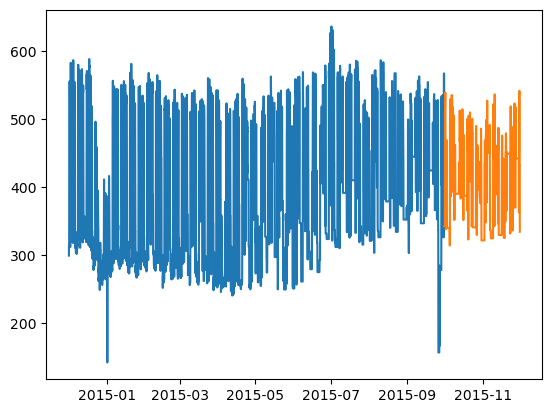

In [53]:
import matplotlib.pyplot as plt

# Plotting the train dataset
plt.plot(train.index, train.values, label='Train')

# Plotting the test dataset
plt.plot(test.index, test.values, label='Test')

# Plotting the predicted values
plt.plot(test.index[1:], predictions[1:], label='Predicted')

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Train, Test, and Predicted')
plt.legend()

# Show the plot
plt.show()


test

In [65]:
model = ARIMA(train, order=(1, 2, 1))  # Replace p, d, and q with appropriate values
model_fit = model.fit()

In [66]:
predictions = model_fit.forecast(steps=len(test))

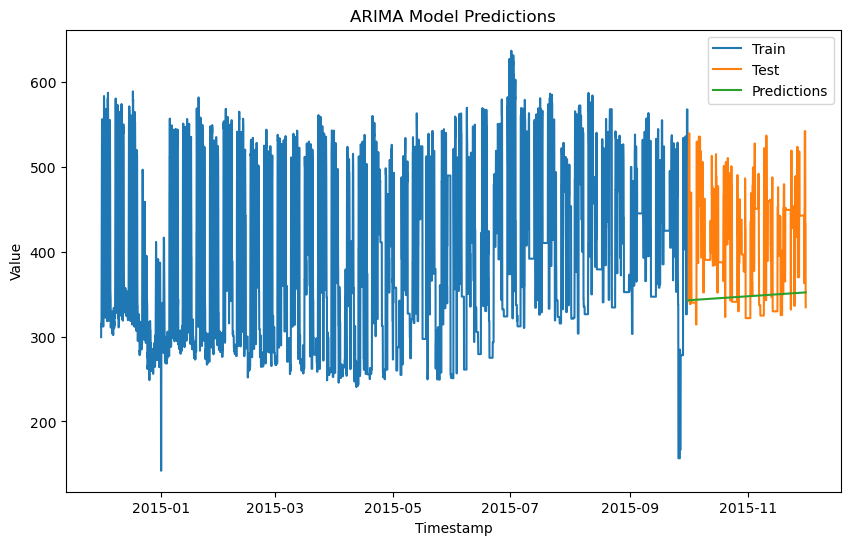

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()